In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Set a professional visual style for all plots
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (14, 8)  # Use a slightly wider format for comparisons

print("Setup Complete. Libraries loaded.")

Setup Complete. Libraries loaded.


In [3]:
# Define the path to our results artifact
results_path = os.path.join("..", "results", "model_performance.csv")

# Load the data
try:
    df_results = pd.read_csv(results_path)
    print(f"Successfully loaded results artifact with shape: {df_results.shape}")
except FileNotFoundError:
    print(f"ERROR: File not found at {results_path}")
    assert False, "Please run the main pipeline script first."

# --- Validate the structure ---
print("\n--- First 5 Rows of Results ---")
display(df_results.head())

print(f"\nUnique Datasets: {df_results['dataset'].unique().tolist()}")
print(f"Unique Models:   {df_results['model'].unique().tolist()}")
print(
    f"Number of Runs per Combination: \n{df_results.groupby(['dataset', 'model']).size().unstack()}"
)

Successfully loaded results artifact with shape: (90, 8)

--- First 5 Rows of Results ---


,dataset,model,run_id,accuracy,precision,recall,f1,roc_auc
0,baseline,LogisticRegression,1,0.731278,0.735000,0.948387,0.828169,0.596192
1,baseline,LogisticRegression,2,0.775330,0.765306,0.967742,0.854701,0.700806
2,baseline,LogisticRegression,3,0.740088,0.737624,0.961290,0.834734,0.631541
3,baseline,LogisticRegression,4,0.740088,0.733010,0.974194,0.836565,0.625896
4,baseline,LogisticRegression,5,0.726872,0.738462,0.929032,0.822857,0.640054



Unique Datasets: ['baseline', 'ratio', 'threshold']
Unique Models:   ['LogisticRegression', 'KNN', 'RandomForest']
Number of Runs per Combination: 
model      KNN  LogisticRegression  RandomForest
dataset                                         
baseline    10                  10            10
ratio       10                  10            10
threshold   10                  10            10


In [4]:
# Group by dataset and model, then calculate the mean and standard deviation for key metrics
summary_stats = df_results.groupby(["dataset", "model"]).agg(
    {
        "recall": ["mean", "std"],
        "f1": ["mean", "std"],
        "accuracy": ["mean", "std"],
        "precision": ["mean", "std"],
        "roc_auc": ["mean", "std"],
    }
)

# Format the table for better readability
summary_stats = summary_stats.round(4)  # Round to 4 decimal places

print("--- Aggregated Performance Metrics (Mean ± Std. Dev. over 10 runs) ---")
display(summary_stats)

--- Aggregated Performance Metrics (Mean ± Std. Dev. over 10 runs) ---


recall              f1         accuracy          \
                                mean     std    mean     std     mean     std   
dataset   model                                                                 
baseline  KNN                 0.8852  0.0233  0.8183  0.0093   0.7317  0.0105   
          LogisticRegression  0.9574  0.0162  0.8335  0.0091   0.7388  0.0141   
          RandomForest        0.9381  0.0200  0.8407  0.0119   0.7573  0.0173   
ratio     KNN                 0.8955  0.0235  0.8217  0.0103   0.7348  0.0128   
          LogisticRegression  0.9574  0.0122  0.8346  0.0079   0.7410  0.0124   
          RandomForest        0.9400  0.0215  0.8388  0.0102   0.7533  0.0151   
threshold KNN                 0.8981  0.0272  0.8251  0.0163   0.7401  0.0234   
          LogisticRegression  0.9581  0.0140  0.8366  0.0080   0.7445  0.0125   
          RandomForest        0.9400  0.0175  0.8422  0.0117   0.7595  0.0179   

                             precision         roc_auc          
                                  mean     std    mean     std  
dataset   model                                                 
baseline  KNN                   0.7610  0.0061  0.6740  0.0249  
          LogisticRegression    0.7380  0.0100  0.6301  0.0328  
          RandomForest          0.7617  0.0111  0.6642  0.0400  
ratio     KNN                   0.7594  0.0080  0.6884  0.0275  
          LogisticRegression    0.7398  0.0082  0.6348  0.0335  
          RandomForest          0.7575  0.0125  0.6713  0.0405  
threshold KNN                   0.7633  0.0158  0.6695  0.0312  
          LogisticRegression    0.7426  0.0089  0.6321  0.0361  
          RandomForest          0.7630  0.0130  0.6625  0.0357

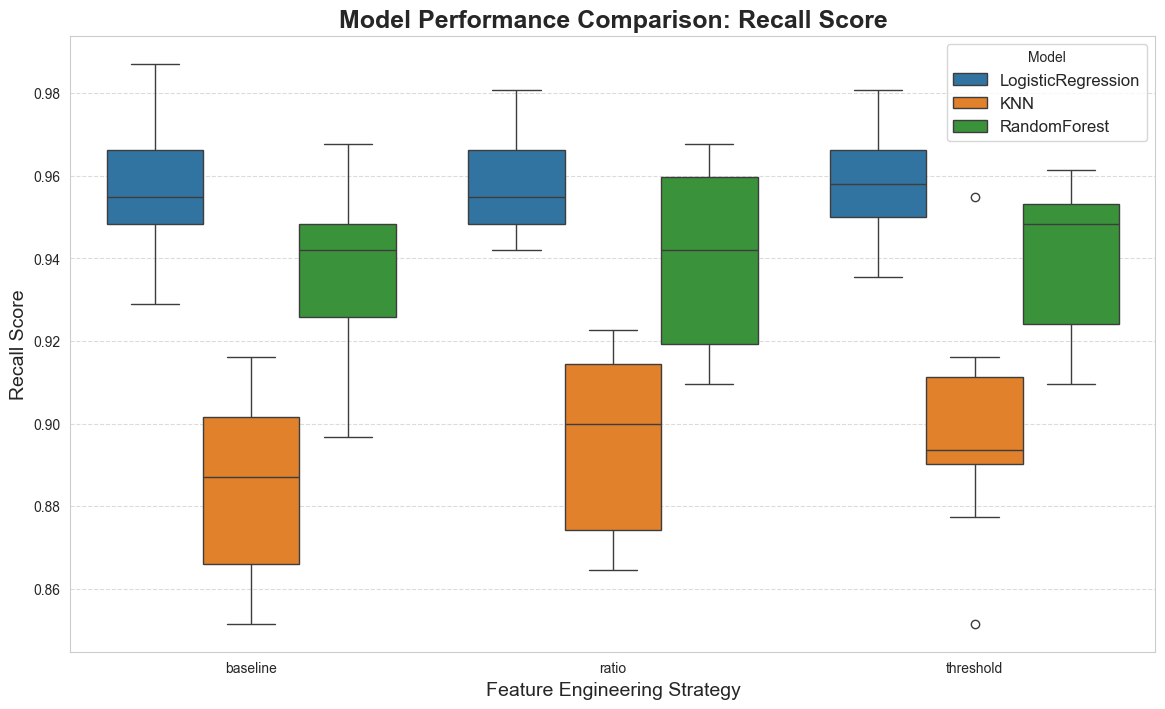

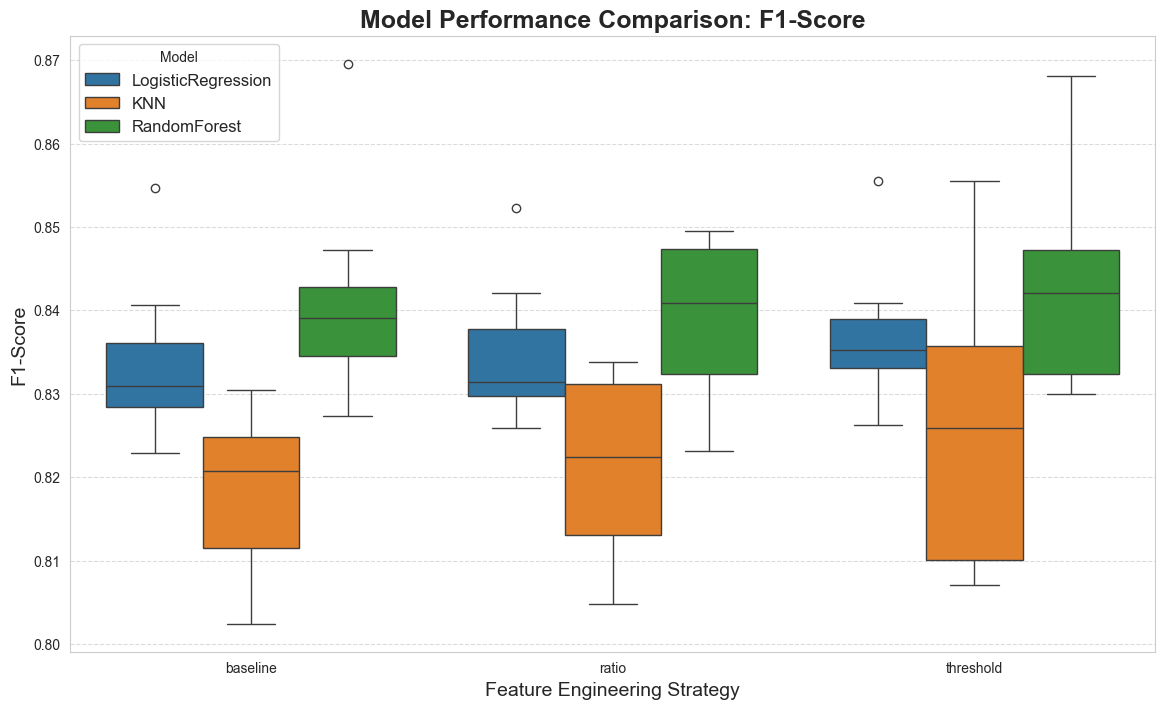

In [5]:
# --- Visualization 1: Recall Comparison ---
plt.figure()
sns.boxplot(
    data=df_results,
    x="dataset",
    y="recall",
    hue="model",
    order=["baseline", "ratio", "threshold"],
)  # Enforce a logical order
plt.title("Model Performance Comparison: Recall Score", fontsize=18, weight="bold")
plt.xlabel("Feature Engineering Strategy", fontsize=14)
plt.ylabel("Recall Score", fontsize=14)
plt.legend(title="Model", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# --- Visualization 2: F1-Score Comparison ---
plt.figure()
sns.boxplot(
    data=df_results,
    x="dataset",
    y="f1",
    hue="model",
    order=["baseline", "ratio", "threshold"],
)  # Enforce a logical order
plt.title("Model Performance Comparison: F1-Score", fontsize=18, weight="bold")
plt.xlabel("Feature Engineering Strategy", fontsize=14)
plt.ylabel("F1-Score", fontsize=14)
plt.legend(title="Model", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [6]:
# Find the single best combination based on the mean recall
best_combination = summary_stats["recall"]["mean"].idxmax()
best_performance = summary_stats.loc[best_combination]

print("--- Conclusion ---")
print(
    f"The best performing combination based on mean recall is: {best_combination[1]} on the '{best_combination[0]}' dataset."
)
print("\nPerformance of the winning model:")
print(best_performance)

--- Conclusion ---
The best performing combination based on mean recall is: LogisticRegression on the 'threshold' dataset.

Performance of the winning model:
recall     mean    0.9581
           std     0.0140
f1         mean    0.8366
           std     0.0080
accuracy   mean    0.7445
           std     0.0125
precision  mean    0.7426
           std     0.0089
roc_auc    mean    0.6321
           std     0.0361
Name: (threshold, LogisticRegression), dtype: float64


## --- Visualization 3 & 4: Champion Model Deep Dive ---
After identifying LogisticRegression as the champion, we now create visualizations
focusing solely on its performance for the final thesis report.

In [7]:
print(
    "\n--- Generating Final Visualizations for the Champion Model (Logistic Regression) ---"
)

# 1. Isolate the champion model's data
champion_model_name = "LogisticRegression"
df_champion = df_results[df_results["model"] == champion_model_name].copy()

# Ensure the 'dataset' column is in the desired logical order for plotting
logical_order = ["baseline", "ratio", "threshold"]
df_champion["dataset"] = pd.Categorical(
    df_champion["dataset"], categories=logical_order, ordered=True
)


--- Generating Final Visualizations for the Champion Model (Logistic Regression) ---



Displaying Bar Chart (Figure D2)...


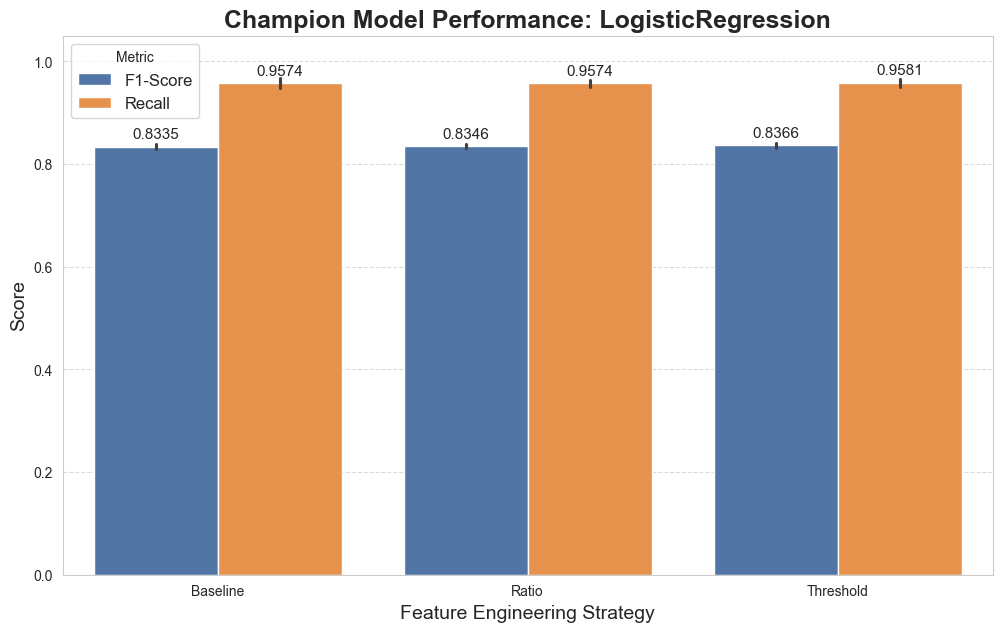

In [9]:
# --- Visualization 3: Clustered Bar Chart (F1-Score and Recall) ---

# We need to "melt" the DataFrame to make it suitable for seaborn's hue functionality
df_champion_melted = df_champion.melt(
    id_vars=["dataset"],
    value_vars=["f1", "recall"],
    var_name="Metric",
    value_name="Score",
)

# Rename for nicer plot labels
df_champion_melted["Metric"] = df_champion_melted["Metric"].replace(
    {"f1": "F1-Score", "recall": "Recall"}
)


plt.figure(figsize=(12, 7))  # A slightly different size for a focused chart
ax = sns.barplot(
    data=df_champion_melted,
    x="dataset",
    y="Score",
    hue="Metric",
    palette={"Recall": "#FF8F33", "F1-Score": "#4374B3"},  # Consistent colors
    order=logical_order,
)

# Add text labels on top of each bar
# We calculate the mean for the label from the original df_champion
for metric, group in df_champion_melted.groupby("Metric"):
    for i, strategy in enumerate(logical_order):
        mean_score = df_champion_melted[
            (df_champion_melted["dataset"] == strategy)
            & (df_champion_melted["Metric"] == metric)
        ]["Score"].mean()

        # Find the correct bar to annotate
        bar_x = i - 0.2 if metric == "F1-Score" else i + 0.2
        ax.text(
            bar_x,
            mean_score + 0.01,
            f"{mean_score:.4f}",
            ha="center",
            va="bottom",
            fontsize=11,
        )

plt.title(
    f"Champion Model Performance: {champion_model_name}",
    fontsize=18,
    weight="bold",
)
plt.xlabel("Feature Engineering Strategy", fontsize=14)
plt.ylabel("Score", fontsize=14)
plt.ylim(0, 1.05)
plt.xticks(ticks=[0, 1, 2], labels=["Baseline", "Ratio", "Threshold"])
plt.legend(title="Metric", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

print("\nDisplaying Bar Chart (Figure D2)...")
plt.show()


Displaying Line Graph (Figure D3)...


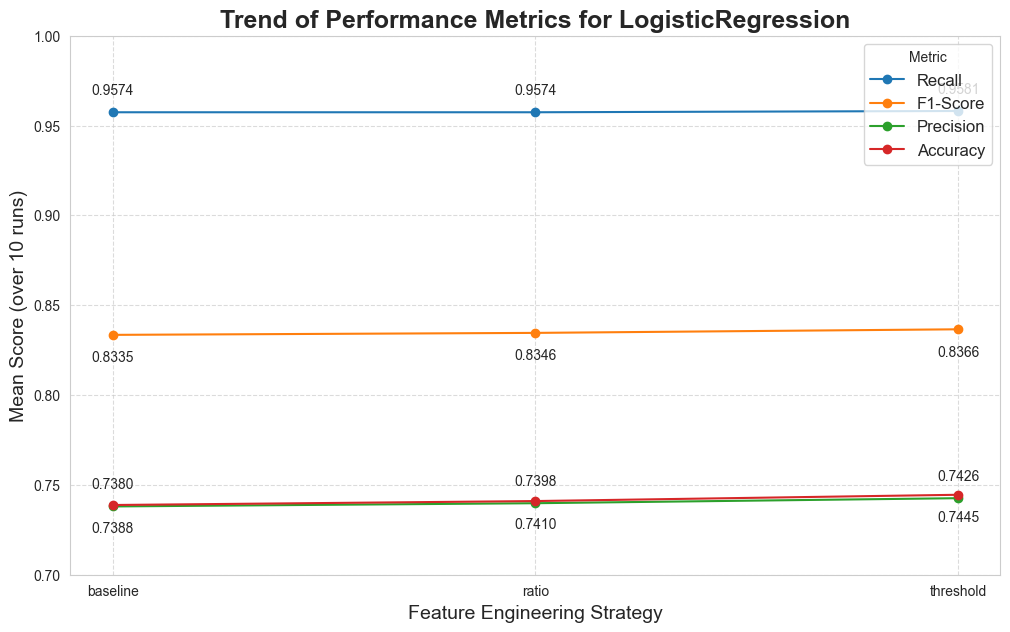

In [12]:
# --- Visualization 4: Line Graph (Trend of All Metrics) ---

# We need to use the summary_stats table we created earlier for the mean values
df_champion_summary = summary_stats.loc[(slice(None), champion_model_name), :]

# Reset index to make 'dataset' a regular column for plotting
df_champion_summary = df_champion_summary.reset_index()
# Flatten the multi-level column headers
df_champion_summary.columns = [
    "_".join(col).strip() if col[1] else col[0]
    for col in df_champion_summary.columns.values
]

plt.figure(figsize=(12, 7))

# Plot each metric as a line
plt.plot(
    df_champion_summary["dataset"],
    df_champion_summary["recall_mean"],
    marker="o",
    linestyle="-",
    label="Recall",
)
plt.plot(
    df_champion_summary["dataset"],
    df_champion_summary["f1_mean"],
    marker="o",
    linestyle="-",
    label="F1-Score",
)
plt.plot(
    df_champion_summary["dataset"],
    df_champion_summary["precision_mean"],
    marker="o",
    linestyle="-",
    label="Precision",
)
plt.plot(
    df_champion_summary["dataset"],
    df_champion_summary["accuracy_mean"],
    marker="o",
    linestyle="-",
    label="Accuracy",
)

# Add value labels to each point on the graph
for i, row in df_champion_summary.iterrows():
    plt.text(
        row["dataset"],
        row["recall_mean"] + 0.01,
        f"{row['recall_mean']:.4f}",
        ha="center",
    )
    plt.text(
        row["dataset"], row["f1_mean"] - 0.015, f"{row['f1_mean']:.4f}", ha="center"
    )
    plt.text(
        row["dataset"],
        row["precision_mean"] + 0.01,
        f"{row['precision_mean']:.4f}",
        ha="center",
    )
    plt.text(
        row["dataset"],
        row["accuracy_mean"] - 0.015,
        f"{row['accuracy_mean']:.4f}",
        ha="center",
    )


plt.title(
    f"Trend of Performance Metrics for {champion_model_name}",
    fontsize=18,
    weight="bold",
)
plt.xlabel("Feature Engineering Strategy", fontsize=14)
plt.ylabel("Mean Score (over 10 runs)", fontsize=14)
plt.ylim(0.7, 1.0)  # Zoom in on the relevant y-axis range
plt.legend(title="Metric", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)

print("\nDisplaying Line Graph (Figure D3)...")
plt.show()